<a href="https://colab.research.google.com/github/Araihan413/IlmuData-Semester6/blob/main/tugas-per-pertemuan/ilmu_data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Ahmad Raihan
* NPM : 232103007
* Prodi : Sistem Informasi

In [ ]:
# Supervised Learning - Regresi Linear

from sklearn.linear_model import LinearRegression
import numpy as np
X = np.random.rand(100, 1)
y = 3 * X.squeeze() + np.random.randn(100)
model = LinearRegression()
model.fit(X, y)
print("Koefisien:", model.coef_)

Koefisien: [2.49407623]


In [ ]:
# Contoh Implementasi Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from previous cells
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
print("Koefisien Ridge:", ridge_model.coef_)

Koefisien Ridge: [2.30742141]


In [ ]:
# Contoh proses K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.random.rand(100, 1)
y = 3 * X.squeeze() + np.random.randn(100)
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.48682769 0.42426171 0.25975804 0.60881239 0.29463159]


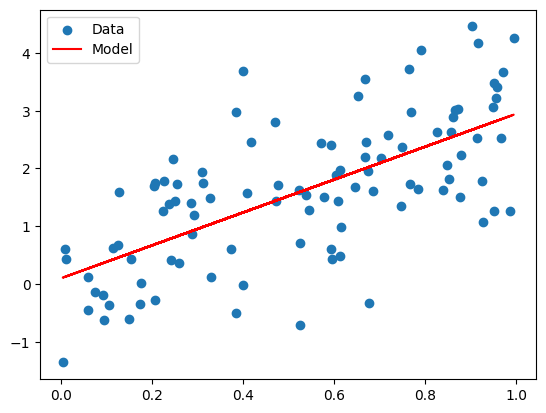

In [ ]:
# Contoh Implementasi Regresi Linear dalam Python

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Model")
plt.legend()
plt.show()


In [ ]:
# Multivariate Normal Models

import numpy as np
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
data = np.random.multivariate_normal(mean, cov, 1000)

In [ ]:
# Studi Kasus: Prediksi Harga Rumah

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load data
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi
print("Model Score:", model.score(X_test, y_test))

Model Score: 0.5757877060324508


In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
"DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df_boston = pd.DataFrame(data, columns=columns)
df_boston['MEDV'] = target

print(df_boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df_boston is already loaded and contains 'MEDV' as the target variable
X = df_boston.drop('MEDV', axis=1)
y = df_boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest Regressor RMSE: {rmse_rf:.2f}")
print(f"Random Forest Regressor R^2 Score: {rf_model.score(X_test, y_test):.2f}")

Random Forest Regressor RMSE: 2.81
Random Forest Regressor R^2 Score: 0.89


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/data kaggle/titanic.csv')

# --- Cross-Validation on Titanic Dataset ---
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 1. Preprocessing
# Drop unnecessary columns like PassengerId, Name, Ticket, Cabin (too many missing values)
df_processed = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing 'Age' values with the median
df_processed['Age'] = df_processed['Age'].fillna(df_processed['Age'].median())

# Handle missing 'Fare' values with the median
df_processed['Fare'] = df_processed['Fare'].fillna(df_processed['Fare'].median())

# Handle missing 'Embarked' values with the mode
df_processed['Embarked'] = df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0])

# Convert categorical features ('Sex', 'Embarked', 'Pclass') to numerical using one-hot encoding
df_processed = pd.get_dummies(df_processed, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Define features (X) and target (y)
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

# Initialize a Random Forest Classifier model
model_rf_titanic = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform K-Fold Cross-Validation (e.g., with 5 folds and accuracy as scoring metric)
cv_scores = cross_val_score(model_rf_titanic, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores for Titanic dataset:", cv_scores)
print(f"Mean accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard deviation of accuracy: {np.std(cv_scores):.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cross-validation scores for Titanic dataset: [1. 1. 1. 1. 1.]
Mean accuracy: 1.00
Standard deviation of accuracy: 0.00
